In [ ]:
import pandas as pd
import nltk
from nltk import word_tokenize, pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
import string

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/Copy of train.csv")

#tools:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [ ]:
def extract_features_nltk(text):
  # clean ups:
  text = str(text).replace("SIL", "").strip()
  tokens = word_tokenize(text.lower())
  pos_tags = pos_tag(tokens)

  # counts:
  count_tokens = len(tokens)
  count_unique = len(set(tokens))

  # sentiment score:
  sentiment_score = sentiment_analyzer.polarity_scores(text)

  # POS tag ratios
  count_nouns = len([t for t, p in pos_tags if p.startswith("NN")])
  count_verbs = len([t for t, p in pos_tags if p.startswith("VB")])
  count_pronouns = len([t for t, p in pos_tags if p.startswith("PRP")])
  count_adverbs = len([t for t, p in pos_tags if p.startswith("RB")])

  # Stop words:
  from nltk.corpus import stopwords
  stop_word_ratio = sum(1 for w in tokens if w in stopwords.words("english")) / count_tokens if count_tokens else 0


  # Discard cue words:
  cue_words = ["i think", "you know", "yeah", "so", "well", "ok", "okay"]
  cue_presence = sum(text.lower().count(cue.lower()) for cue in cue_words)

  # Combine features
  features = {
    "count_tokens": count_tokens,
    "count_unique": count_unique,
    "noun_ratio": count_nouns / count_tokens if count_tokens else 0,
    "verb_ratio": count_verbs / count_tokens if count_tokens else 0,
    "pronoun_ratio": count_pronouns / count_tokens if count_tokens else 0,
    "adverb_ratio": count_adverbs / count_tokens if count_tokens else 0,
    "sentiment_pos": sentiment_score['pos'],
    "sentiment_neg": sentiment_score['neg'],
    "sentiment_neu": sentiment_score['neu'],
    "sentiment_compound": sentiment_score['compound'],
    "stop_word_ratio": stop_word_ratio,
    "count_cue": cue_presence
  }
  return features

In [ ]:
features_df = train_df["transcript"].apply(extract_features_nltk).apply(pd.Series)
text_features_train = pd.concat([train_df.iloc[:, :6], features_df], axis=1)

display(text_features_train[: 5])
text_features_train.to_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/text_features_train.csv", index=False)

,dialog_id,speaker,transcript,da_tag,start_time,end_time,count_tokens,count_unique,noun_ratio,verb_ratio,pronoun_ratio,adverb_ratio,sentiment_pos,sentiment_neg,sentiment_neu,sentiment_compound,stop_word_ratio,count_cue
0,sw2005,B,SIL,x,0.00000,10.94882,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000,0.0,0.000,0.0000,0.000000,0.0
1,sw2005,A,SIL,x,10.93013,21.35084,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000,0.0,0.000,0.0000,0.000000,0.0
2,sw2005,B,well of course it's you know it's one of the l...,sv,10.94882,22.28000,46.0,28.0,0.108696,0.23913,0.23913,0.086957,0.139,0.0,0.861,0.6486,0.521739,6.0
3,sw2005,A,yes,b,21.35084,22.08088,1.0,1.0,1.000000,0.00000,0.00000,0.000000,1.000,0.0,0.000,0.4019,0.000000,0.0
4,sw2005,A,SIL,x,22.08088,44.96288,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000,0.0,0.000,0.0000,0.000000,0.0


In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/Copy of test.csv")
features_df = test_df["transcript"].apply(extract_features_nltk).apply(pd.Series)
text_features_test = pd.concat([test_df.iloc[:, :6], features_df], axis=1)

display(text_features_test[: 5])
text_features_test.to_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/text_features_test.csv", index=False)

,dialog_id,speaker,transcript,da_tag,start_time,end_time,count_tokens,count_unique,noun_ratio,verb_ratio,pronoun_ratio,adverb_ratio,sentiment_pos,sentiment_neg,sentiment_neu,sentiment_compound,stop_word_ratio,count_cue
0,sw2019,A,SIL,NaN,0.00000,2.92922,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.000,0.000,0.000000,0.0
1,sw2019,B,SIL,NaN,0.00000,4.46754,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.000,0.000,0.000000,0.0
2,sw2019,A,uh do you have a pet randy,NaN,2.92922,4.31867,7.0,7.0,0.428571,0.285714,0.142857,0.0,0.000,0.0,1.000,0.000,0.571429,0.0
3,sw2019,A,SIL,NaN,4.31867,6.74838,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.000,0.000,0.000000,0.0
4,sw2019,B,uh yeah,NaN,4.46754,5.01339,2.0,2.0,1.000000,0.000000,0.000000,0.0,0.688,0.0,0.312,0.296,0.000000,1.0


In [ ]:
valid_df = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/Copy of valid.csv")
features_df = valid_df["transcript"].apply(extract_features_nltk).apply(pd.Series)
text_features_valid = pd.concat([valid_df.iloc[:, :6], features_df], axis=1)

display(text_features_valid[: 5])
text_features_valid.to_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/text_features_valid.csv", index=False)

,dialog_id,speaker,transcript,da_tag,start_time,end_time,count_tokens,count_unique,noun_ratio,verb_ratio,pronoun_ratio,adverb_ratio,sentiment_pos,sentiment_neg,sentiment_neu,sentiment_compound,stop_word_ratio,count_cue
0,sw2025,B,SIL,x,0.00000,1.91195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,sw2025,A,SIL,x,1.87913,2.70028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sw2025,A,oh,%,2.70028,2.92781,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,sw2025,A,all right,b,2.92781,3.61040,2.0,2.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0
4,sw2025,B,SIL,x,3.20215,5.13744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Part B: Feature Analysis


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your text feature data
df = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/text_features_train.csv")

# Inspect a few rows
print(df.head(3))
print(df["da_tag"].value_counts())


  dialog_id speaker                                         transcript da_tag  \
0    sw2005       B                                                SIL      x   
1    sw2005       A                                                SIL      x   
2    sw2005       B  well of course it's you know it's one of the l...     sv   

   start_time  end_time  count_tokens  count_unique  noun_ratio  verb_ratio  \
0     0.00000  10.94882           0.0           0.0    0.000000     0.00000   
1    10.93013  21.35084           0.0           0.0    0.000000     0.00000   
2    10.94882  22.28000          46.0          28.0    0.108696     0.23913   

   pronoun_ratio  adverb_ratio  sentiment_pos  sentiment_neg  sentiment_neu  \
0        0.00000      0.000000          0.000            0.0          0.000   
1        0.00000      0.000000          0.000            0.0          0.000   
2        0.23913      0.086957          0.139            0.0          0.861   

   sentiment_compound  stop_word_ratio  c

In [ ]:
sentiment_means = (
    df.groupby("da_tag")["sentiment_compound"]
      .mean()
      .sort_values(ascending=False)
)
print(sentiment_means)


da_tag
ba    0.290528
ny    0.284085
fc    0.231445
aa    0.170079
b     0.128008
sv    0.093636
sd    0.088674
qy    0.074896
%     0.042121
x     0.000111
Name: sentiment_compound, dtype: float64


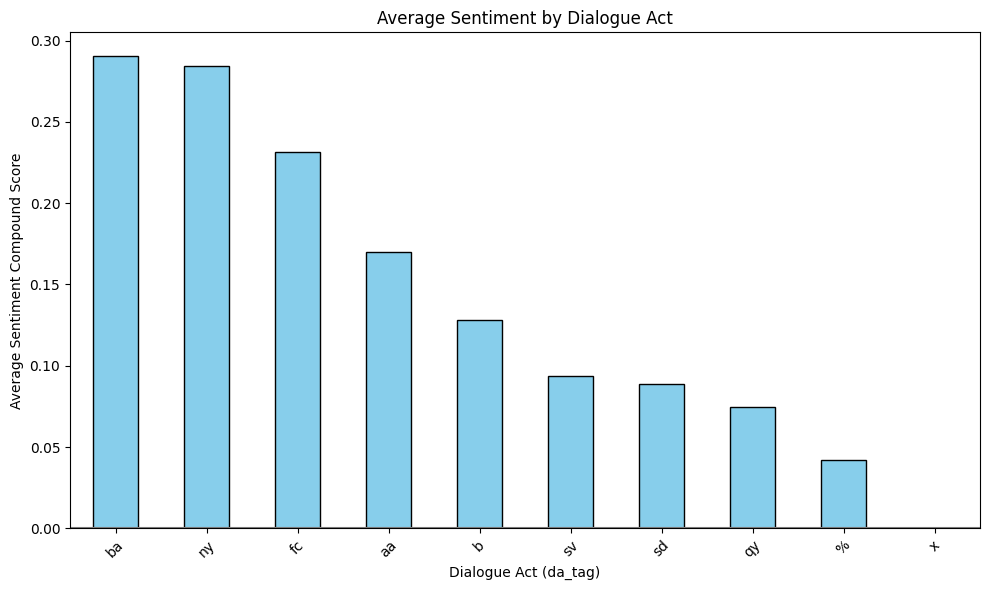

In [ ]:
plt.figure(figsize=(10, 6))
sentiment_means.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Average Sentiment by Dialogue Act")
plt.xlabel("Dialogue Act (da_tag)")
plt.ylabel("Average Sentiment Compound Score")
plt.axhline(0, color="gray")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_ind

sv_sentiment = df[df["da_tag"] == "sv"]["sentiment_compound"]
sd_sentiment = df[df["da_tag"] == "sd"]["sentiment_compound"]

t_stat, p_value = ttest_ind(sv_sentiment, sd_sentiment, equal_var=False)
print(f"T-statistic = {t_stat:.3f}, p-value = {p_value:.3e}")


T-statistic = 1.090, p-value = 2.757e-01


T-statistic = 7.993, p-value = 2.719e-15


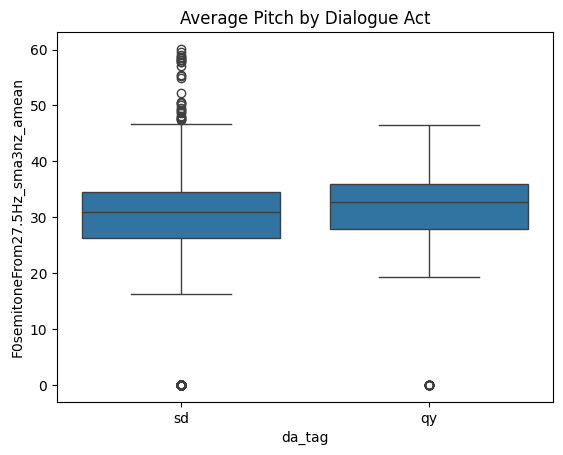

In [ ]:
# Speech Features:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/speech_features_train.csv")

# Pitch difference between questions and statements
pitch_questions = df[df["da_tag"] == "qy"]["F0semitoneFrom27.5Hz_sma3nz_amean"]
pitch_statements = df[df["da_tag"] == "sd"]["F0semitoneFrom27.5Hz_sma3nz_amean"]

t_stat, p_val = ttest_ind(pitch_questions, pitch_statements, equal_var=False)
print(f"T-statistic = {t_stat:.3f}, p-value = {p_val:.3e}")

sns.boxplot(x="da_tag", y="F0semitoneFrom27.5Hz_sma3nz_amean",
            data=df[df["da_tag"].isin(["qy", "sd"])])
plt.title("Average Pitch by Dialogue Act")
plt.show()


# Part C: Classification and Error Analysis

In [ ]:
import pandas as pd
# Count rows
text_features = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/text_features_train.csv")
speech_features = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/speech_features_train.csv")
num_text_rows = text_features.shape[0]
num_speech_rows = speech_features.shape[0]

print(f"Number of rows in text features: {num_text_rows}")
print(f"Number of rows in speech features: {num_speech_rows}")


Number of rows in text features: 74111
Number of rows in speech features: 74111


In [ ]:
top_10_tags = ["sd", "b", "sv", "%", "aa", "qy", "ba", "ny", "fc", "x"]

In [ ]:
# only use NLTK
import pandas as pd

# Load data
text_train = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/text_features_train.csv")
text_test  = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/text_features_test.csv")
text_valid = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/text_features_valid.csv")

speech_train = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/speech_features_train_large.csv")
speech_test  = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/speech_features_test_large.csv")
speech_valid = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/speech_features_valid_large.csv")

# Keep only top 10 DA tags
text_train = text_train[text_train["da_tag"].isin(top_10_tags)].reset_index(drop=True)
text_valid = text_valid[text_valid["da_tag"].isin(top_10_tags)].reset_index(drop=True)
speech_train = speech_train[speech_train["da_tag"].isin(top_10_tags)].reset_index(drop=True)
speech_valid = speech_valid[speech_valid["da_tag"].isin(top_10_tags)].reset_index(drop=True)
print("Filtered Text Train:", text_train.shape)
print("Filtered Speech Train:", speech_train.shape)


Filtered Text Train: (74111, 18)
Filtered Speech Train: (74111, 93)


In [ ]:
#COMBINED LIWC with nltk:
import pandas as pd

# --- Load your pre-extracted features ---
# NLTK-derived text features
text_train = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/text_features_train.csv")
text_valid = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/text_features_valid.csv")
text_test  = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/text_features_test.csv")

# LIWC features
liwc_train = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/Copy of train.csv")
liwc_valid = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/Copy of valid.csv")
liwc_test  = pd.read_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/Copy of test.csv")
# Drop the transcript from LIWC if you already have it in NLTK features
liwc_train_clean = liwc_train.drop(columns=["transcript"], errors="ignore")
liwc_valid_clean = liwc_valid.drop(columns=["transcript"], errors="ignore")
liwc_test_clean  = liwc_test.drop(columns=["transcript"], errors="ignore")
# --- Merge on identifiers ---
def merge_text_liwc(text_df, liwc_df):
    combined = pd.merge(
        text_df,
        liwc_df,
        on=["dialog_id", "speaker", "start_time", "end_time", "da_tag"],
        how="inner"
    )
    return combined

text_train = merge_text_liwc(text_train, liwc_train_clean)
text_valid = merge_text_liwc(text_valid, liwc_valid_clean)
text_test  = merge_text_liwc(text_test, liwc_test_clean)

print("Train features shape:", text_train.shape)
print("Validation features shape:", text_valid.shape)
print("Test features shape:", text_test.shape)

text_train.to_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/text_combined_features_train.csv", index=False)
text_valid.to_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/text_combined_features_valid.csv", index=False)
text_test.to_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/text_combined_features_test.csv", index=False)

print("Finised")


Train features shape: (74111, 91)
Validation features shape: (19156, 91)
Test features shape: (23540, 91)
Finised


In [ ]:
train_combined = pd.merge(
    text_train,
    speech_train,
    on=["dialog_id", "speaker", "da_tag", "start_time", "end_time"],
    how="inner"
)

valid_combined = pd.merge(
    text_valid,
    speech_valid,
    on=["dialog_id", "speaker", "da_tag", "start_time", "end_time"],
    how="inner"
)

merge_keys = ["dialog_id", "speaker", "start_time", "end_time", "da_tag"]
common_keys = [k for k in merge_keys if k in text_test.columns and k in speech_test.columns]

test_combined = pd.merge(
    text_test,
    speech_test,
    on=common_keys,
    how="inner"
)

print("Combined shapes:")
print("Train:", train_combined.shape)
print("Valid:", valid_combined.shape)
print("Test:", test_combined.shape)

# === 4. Prepare X and y ===
X_train = train_combined.drop(columns=["dialog_id", "speaker", "da_tag", "start_time", "end_time"])
y_train = train_combined["da_tag"]

X_valid = valid_combined.drop(columns=["dialog_id", "speaker", "da_tag", "start_time", "end_time"])
y_valid = valid_combined["da_tag"]

# For test (no y)
X_test = test_combined.drop(columns=["dialog_id", "speaker", "start_time", "end_time"], errors="ignore")

print("Feature matrix shapes:")
print("X_train:", X_train.shape, "| y_train:", y_train.shape)
print("X_valid:", X_valid.shape, "| y_valid:", y_valid.shape)
print("X_test:", X_test.shape)

train_combined.to_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/combined_features_train.csv", index=False)
valid_combined.to_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/combined_features_valid.csv", index=False)
test_combined.to_csv("/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/combined_features_test.csv", index=False)

print("Finished")


Combined shapes:
Train: (74111, 179)
Valid: (19156, 179)
Test: (23540, 179)
Feature matrix shapes:
X_train: (74111, 174) | y_train: (74111,)
X_valid: (19156, 174) | y_valid: (19156,)
X_test: (23540, 175)
Finised


In [ ]:
print(test_combined)

      dialog_id speaker                                         transcript  \
0        sw2019       A                                                SIL   
1        sw2019       B                                                SIL   
2        sw2019       A                         uh do you have a pet randy   
3        sw2019       A                                                SIL   
4        sw2019       B                                            uh yeah   
...         ...     ...                                                ...   
23535    sw4936       B                                               yeah   
23536    sw4936       B                                                SIL   
23537    sw4936       A                                                SIL   
23538    sw4936       B                                               yeah   
23539    sw4936       B  treated wood can really make you sick too if y...   

       da_tag  start_time   end_time  count_tokens  count_uniqu

In [ ]:
def split_features_labels(df):
    drop_cols = ["dialog_id", "speaker", "da_tag", "start_time", "end_time"]
    # Only drop "transcript" if it exists
    if "transcript" in df.columns:
        drop_cols.append("transcript")

    X = df.drop(columns=drop_cols)
    y = df["da_tag"]
    return X, y

X_text_train, y_text_train = split_features_labels(text_train)
X_text_valid, y_text_valid = split_features_labels(text_valid)

X_speech_train, y_speech_train = split_features_labels(speech_train)
X_speech_valid, y_speech_valid = split_features_labels(speech_valid)

X_comb_train, y_comb_train = split_features_labels(train_combined)
X_comb_valid, y_comb_valid = split_features_labels(valid_combined)


In [ ]:
print(X_text_train.dtypes)


count_tokens     float64
count_unique     float64
noun_ratio       float64
verb_ratio       float64
pronoun_ratio    float64
                  ...   
swear            float64
netspeak         float64
assent           float64
nonflu           float64
filler           float64
Length: 85, dtype: object


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

def train_and_eval(X_train, y_train, X_valid, y_valid, model_name="Model"):
    clf = RandomForestClassifier(n_estimators=200, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)

    print(f"=== {model_name} ===")
    print("Accuracy:", accuracy_score(y_valid, y_pred))
    print(classification_report(y_valid, y_pred, digits=3))
    print("\n")
    return clf

# ---- Train and evaluate ----
clf_text = train_and_eval(
    X_text_train, y_text_train, X_text_valid, y_text_valid, "Text-only"
)

clf_speech = train_and_eval(
    X_speech_train, y_speech_train, X_speech_valid, y_speech_valid, "Speech-only"
)

clf_combined = train_and_eval(
    X_comb_train, y_comb_train, X_comb_valid, y_comb_valid, "Combined Features"
)


=== Text-only ===
Accuracy: 0.8289830862392984
              precision    recall  f1-score   support

           %      0.686     0.631     0.658      1033
          aa      0.556     0.327     0.412       664
           b      0.769     0.957     0.852      2409
          ba      0.804     0.678     0.736       320
          fc      0.561     0.645     0.600       121
          ny      0.172     0.024     0.043       206
          qy      0.763     0.292     0.423       342
          sd      0.746     0.898     0.815      5122
          sv      0.598     0.309     0.407      1765
           x      0.999     0.998     0.999      7174

    accuracy                          0.829     19156
   macro avg      0.665     0.576     0.594     19156
weighted avg      0.814     0.829     0.810     19156



=== Speech-only ===
Accuracy: 0.6835456253915222


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           %      0.338     0.046     0.082      1033
          aa      0.208     0.008     0.015       664
           b      0.538     0.832     0.654      2409
          ba      0.000     0.000     0.000       320
          fc      0.000     0.000     0.000       121
          ny      0.000     0.000     0.000       206
          qy      0.000     0.000     0.000       342
          sd      0.592     0.875     0.706      5122
          sv      0.267     0.005     0.009      1765
           x      0.854     0.912     0.882      7174

    accuracy                          0.684     19156
   macro avg      0.280     0.268     0.235     19156
weighted avg      0.596     0.684     0.607     19156



=== Combined Features ===
Accuracy: 0.8173940279807893
              precision    recall  f1-score   support

           %      0.652     0.620     0.635      1033
          aa      0.649     0.242     0.353       664
           b      0.7

=== Text-only ===
Accuracy: 0.8338901649613698
              precision    recall  f1-score   support

           %      0.677     0.666     0.672      1033
          aa      0.559     0.327     0.413       664
           b      0.766     0.958     0.851      2409
          ba      0.819     0.678     0.742       320
          fc      0.548     0.661     0.599       121
          ny      0.241     0.034     0.060       206
          qy      0.761     0.418     0.540       342
          sd      0.777     0.863     0.818      5122
          sv      0.585     0.416     0.486      1765
           x      0.999     0.998     0.999      7174

    accuracy                          0.834     19156
   macro avg      0.673     0.602     0.618     19156
weighted avg      0.821     0.834     0.821     19156





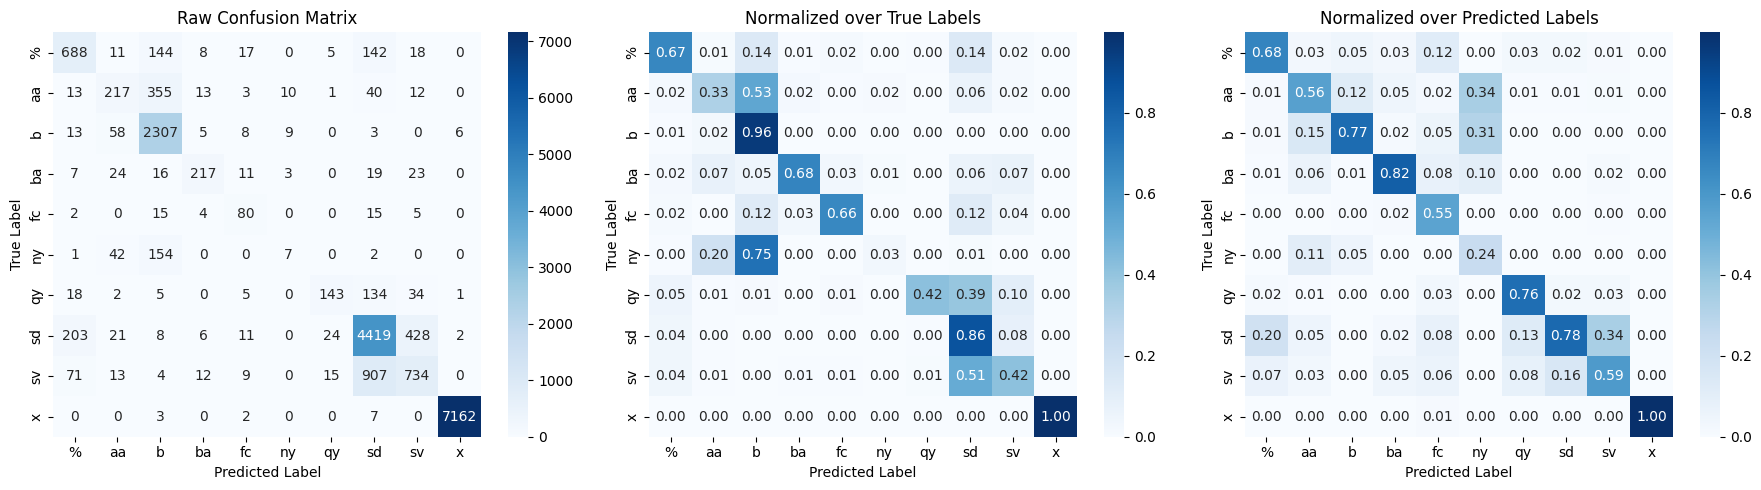

=== Speech-only ===
Accuracy: 0.6865211944038422
              precision    recall  f1-score   support

           %      0.311     0.149     0.202      1033
          aa      0.295     0.092     0.140       664
           b      0.572     0.797     0.666      2409
          ba      0.294     0.016     0.030       320
          fc      0.357     0.041     0.074       121
          ny      0.143     0.010     0.018       206
          qy      0.417     0.015     0.028       342
          sd      0.603     0.855     0.707      5122
          sv      0.307     0.047     0.082      1765
           x      0.871     0.911     0.891      7174

    accuracy                          0.687     19156
   macro avg      0.417     0.293     0.284     19156
weighted avg      0.631     0.687     0.631     19156





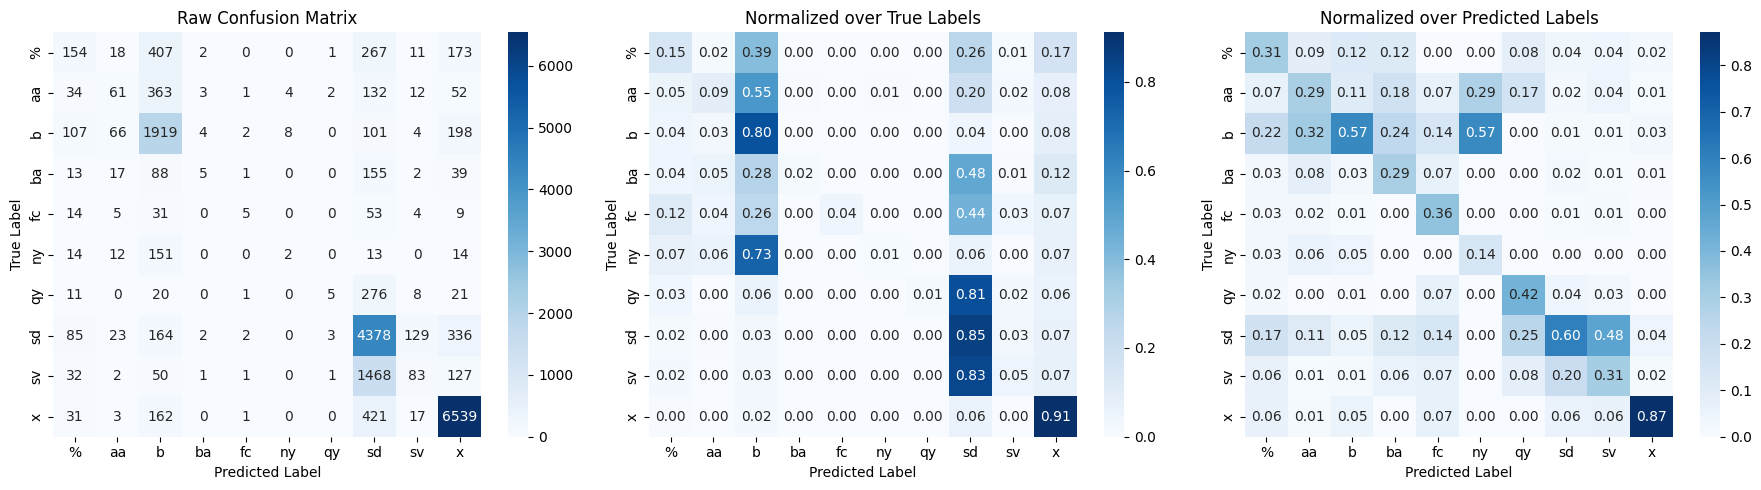

=== Combined Features ===
Accuracy: 0.8273647943203174
              precision    recall  f1-score   support

           %      0.643     0.658     0.651      1033
          aa      0.541     0.316     0.399       664
           b      0.764     0.943     0.844      2409
          ba      0.829     0.666     0.738       320
          fc      0.798     0.554     0.654       121
          ny      0.419     0.087     0.145       206
          qy      0.786     0.354     0.488       342
          sd      0.761     0.867     0.810      5122
          sv      0.561     0.378     0.451      1765
           x      0.998     0.998     0.998      7174

    accuracy                          0.827     19156
   macro avg      0.710     0.582     0.618     19156
weighted avg      0.816     0.827     0.814     19156





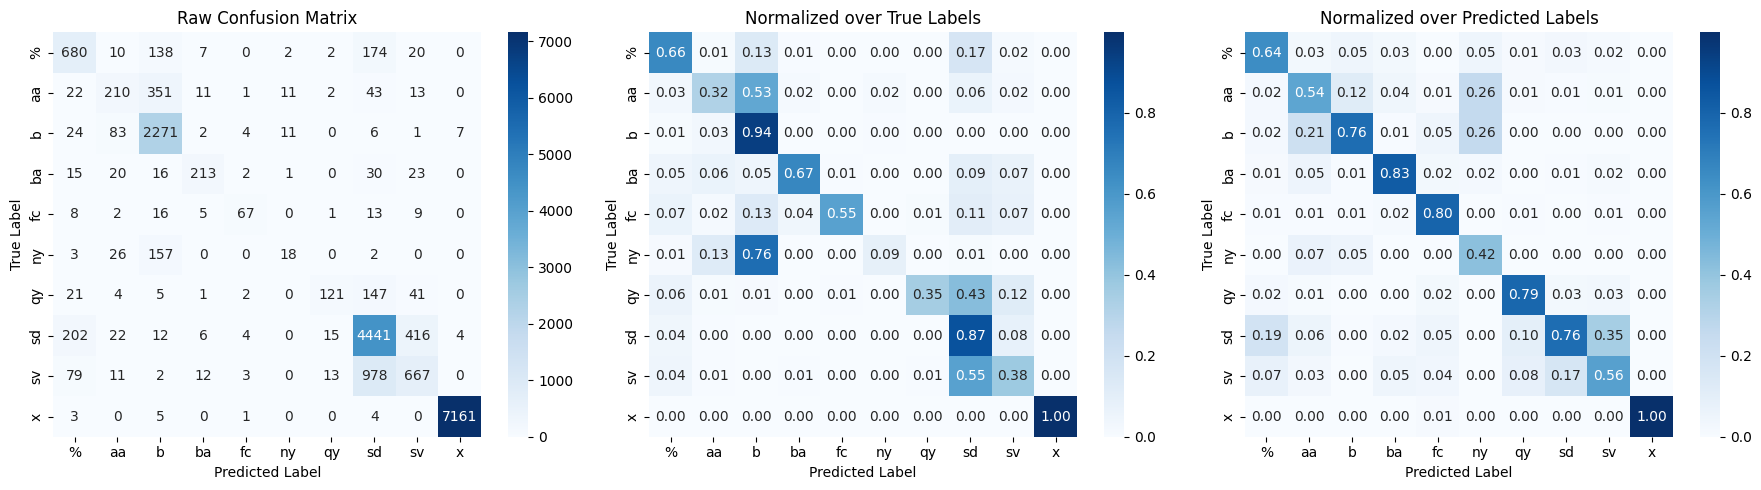

In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Encode labels ----
le = LabelEncoder()
y_text_train_enc = le.fit_transform(y_text_train)
y_text_valid_enc = le.transform(y_text_valid)

y_speech_train_enc = le.fit_transform(y_speech_train)
y_speech_valid_enc = le.transform(y_speech_valid)

y_comb_train_enc = le.fit_transform(y_comb_train)
y_comb_valid_enc = le.transform(y_comb_valid)

# ---- Train function ----
def train_xgb(X_train, y_train, X_valid, y_valid, model_name="Model"):
    clf = xgb.XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        objective="multi:softmax",
        num_class=len(set(y_train)),
        eval_metric="mlogloss",
        # use_label_encoder=False,
        random_state=42
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)

    print(f"=== {model_name} ===")
    print("Accuracy:", accuracy_score(y_valid, y_pred))
    print(classification_report(y_valid, y_pred, digits=3, target_names=le.classes_))
    print("\n")

    # --- Confusion matrices ---
    cm_raw = confusion_matrix(y_valid, y_pred)
    cm_true_norm = confusion_matrix(y_valid, y_pred, normalize='true')
    cm_pred_norm = confusion_matrix(y_valid, y_pred, normalize='pred')

    # --- Visualization ---
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    titles = ['Raw Confusion Matrix', 'Normalized over True Labels', 'Normalized over Predicted Labels']
    cms = [cm_raw, cm_true_norm, cm_pred_norm]

    for ax, cm, title in zip(axes, cms, titles):
        sns.heatmap(cm, annot=True, fmt='.2f' if 'Normalized' in title else 'd',
                    cmap='Blues', ax=ax, xticklabels=le.classes_, yticklabels=le.classes_)
        ax.set_title(title)
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

    return clf, y_pred

# ---- Train and evaluate ----
clf_text, y_text_pred = train_xgb(X_text_train, y_text_train_enc, X_text_valid, y_text_valid_enc, "Text-only")
clf_speech, y_speech_pred = train_xgb(X_speech_train, y_speech_train_enc, X_speech_valid, y_speech_valid_enc, "Speech-only")
clf_combined, y_comb_pred = train_xgb(X_comb_train, y_comb_train_enc, X_comb_valid, y_comb_valid_enc, "Combined Features")



In [ ]:
def make_prediction(model, test_path, output_name):
    df_test = pd.read_csv(test_path)

    # Drop metadata columns to get feature set
    feature_cols = [c for c in df_test.columns if c not in ['dialog_id', 'speaker', 'start_time', 'end_time', 'transcript', 'da_tag']]
    X_test = df_test[feature_cols]

    # Predict
    y_test_pred_enc = model.predict(X_test)
    y_test_pred = le.inverse_transform(y_test_pred_enc)

    # Keep only required columns
    df_submit = df_test[['dialog_id', 'speaker', 'start_time', 'end_time']].copy()
    df_submit['da_tag'] = y_test_pred

    # Save CSV
    df_submit.to_csv(output_name, index=False)
    print(f"Saved submission: {output_name}")
    print(df_submit.head())
    return df_submit

# ---- Generate 3 submission files ----
submit_text = make_prediction(clf_text, "/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/text_combined_features_test.csv", "/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/test_tqo2101_text.csv")
submit_speech = make_prediction(clf_speech, "/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/speech_features_test_large.csv", "/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/test_tqo2101_speech.csv")
submit_combined = make_prediction(clf_combined, "/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/combined_features_test.csv", "/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/test_tqo2101_multi.csv")

Saved submission: /content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/test_tqo2101_text.csv
  dialog_id speaker  start_time  end_time da_tag
0    sw2019       A     0.00000   2.92922      x
1    sw2019       B     0.00000   4.46754      x
2    sw2019       A     2.92922   4.31867     qy
3    sw2019       A     4.31867   6.74838      x
4    sw2019       B     4.46754   5.01339      b
Saved submission: /content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/test_tqo2101_speech.csv
  dialog_id speaker  start_time  end_time da_tag
0    sw2019       A     2.92922   4.31867     sd
1    sw2019       A     0.00000   2.92922      x
2    sw2019       A     4.31867   6.74838     sd
3    sw2019       B     0.00000   4.46754      x
4    sw2019       B     4.46754   5.01339     aa
Saved submission: /content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/test_tqo2101_multi.csv
  dialog_id speaker  start_time  end_time da_tag
0    sw2019       A     0.00000   2.92922      x
1    sw2

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report

# --- Utility function to split features and labels ---
def split_features_labels(df, drop_transcript=False):
    drop_cols = ["dialog_id", "speaker", "da_tag", "start_time", "end_time"]
    if drop_transcript and "transcript" in df.columns:
        drop_cols.append("transcript")
    X = df.drop(columns=drop_cols)
    y = df["da_tag"]
    return X, y

# --- Encode string labels to integers ---
def encode_labels(y_train, y_valid):
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_valid_enc = le.transform(y_valid)
    return y_train_enc, y_valid_enc, le

# --- Train and evaluate XGBoost ---
def train_xgb(X_train, y_train_enc, X_valid, y_valid_enc, model_name="Model"):
    # Compute class-balanced sample weights
    sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_enc)

    clf = xgb.XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        objective="multi:softmax",
        num_class=len(set(y_train_enc)),
        eval_metric="mlogloss",
        use_label_encoder=False,
        random_state=42
    )
    clf.fit(X_train, y_train_enc, sample_weight=sample_weights)

    y_pred = clf.predict(X_valid)
    print(f"=== {model_name} ===")
    print(classification_report(y_valid_enc, y_pred, target_names=le.classes_, digits=3))
    print("\n")
    return clf

# --- Split features and labels ---
# Drop transcript only for text features
X_text_train, y_text_train = split_features_labels(text_train, drop_transcript=True)
X_text_valid, y_text_valid = split_features_labels(text_valid, drop_transcript=True)

X_speech_train, y_speech_train = split_features_labels(speech_train)
X_speech_valid, y_speech_valid = split_features_labels(speech_valid)

X_comb_train, y_comb_train = split_features_labels(train_combined, drop_transcript=True)
X_comb_valid, y_comb_valid = split_features_labels(valid_combined, drop_transcript=True)

# --- Encode labels ---
y_text_train_enc, y_text_valid_enc, le = encode_labels(y_text_train, y_text_valid)
y_speech_train_enc, y_speech_valid_enc, _ = encode_labels(y_speech_train, y_speech_valid)
y_comb_train_enc, y_comb_valid_enc, _ = encode_labels(y_comb_train, y_comb_valid)

# --- Train and evaluate XGBoost models ---
clf_text = train_xgb(X_text_train, y_text_train_enc, X_text_valid, y_text_valid_enc, "Text-only")
clf_speech = train_xgb(X_speech_train, y_speech_train_enc, X_speech_valid, y_speech_valid_enc, "Speech-only")
clf_combined = train_xgb(X_comb_train, y_comb_train_enc, X_comb_valid, y_comb_valid_enc, "Combined Features")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:36:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Text-only ===
              precision    recall  f1-score   support

           %      0.475     0.507     0.490      1033
          aa      0.469     0.227     0.306       664
           b      0.790     0.391     0.524      2409
          ba      0.447     0.681     0.540       320
          fc      0.102     0.694     0.178       121
          ny      0.121     0.874     0.213       206
          qy      0.123     0.471     0.195       342
          sd      0.778     0.477     0.591      5122
          sv      0.380     0.455     0.414      1765
           x      0.997     0.998     0.998      7174

    accuracy                          0.661     19156
   macro avg      0.468     0.578     0.445     19156
weighted avg      0.769     0.661     0.689     19156





/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:36:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Speech-only ===
              precision    recall  f1-score   support

           %      0.256     0.328     0.287      1033
          aa      0.196     0.232     0.212       664
           b      0.598     0.642     0.619      2409
          ba      0.175     0.197     0.185       320
          fc      0.131     0.132     0.132       121
          ny      0.129     0.117     0.122       206
          qy      0.111     0.152     0.128       342
          sd      0.659     0.557     0.604      5122
          sv      0.282     0.335     0.306      1765
           x      0.899     0.865     0.882      7174

    accuracy                          0.618     19156
   macro avg      0.344     0.356     0.348     19156
weighted avg      0.642     0.618     0.628     19156





/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:38:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Combined Features ===
              precision    recall  f1-score   support

           %      0.474     0.615     0.535      1033
          aa      0.326     0.318     0.322       664
           b      0.757     0.798     0.777      2409
          ba      0.570     0.625     0.596       320
          fc      0.473     0.430     0.450       121
          ny      0.223     0.311     0.260       206
          qy      0.209     0.310     0.250       342
          sd      0.755     0.621     0.682      5122
          sv      0.385     0.435     0.409      1765
           x      0.997     0.997     0.997      7174

    accuracy                          0.746     19156
   macro avg      0.517     0.546     0.528     19156
weighted avg      0.762     0.746     0.751     19156





In [ ]:
# ====================================================================
# Testing Neural Network:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def encode_and_scale(X_train, y_train, X_valid, y_valid):
    # Encode labels
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_valid_enc = le.transform(y_valid)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)

    return X_train_scaled, y_train_enc, X_valid_scaled, y_valid_enc, le, scaler

# --- Text-only ---
X_text_train_scaled, y_text_train_enc, X_text_valid_scaled, y_text_valid_enc, le_text, scaler_text = encode_and_scale(
    X_text_train, y_text_train, X_text_valid, y_text_valid
)

# --- Speech-only ---
X_speech_train_scaled, y_speech_train_enc, X_speech_valid_scaled, y_speech_valid_enc, le_speech, scaler_speech = encode_and_scale(
    X_speech_train, y_speech_train, X_speech_valid, y_speech_valid
)

# --- Combined ---
X_comb_train_scaled, y_comb_train_enc, X_comb_valid_scaled, y_comb_valid_enc, le_comb, scaler_comb = encode_and_scale(
    X_comb_train, y_comb_train, X_comb_valid, y_comb_valid
)



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# --- Step 1: Convert to PyTorch tensors ---
def to_tensor(X, y):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    return X_tensor, y_tensor

X_text_train_tensor, y_text_train_tensor = to_tensor(X_text_train_scaled, y_text_train_enc)
X_text_valid_tensor, y_text_valid_tensor = to_tensor(X_text_valid_scaled, y_text_valid_enc)

X_speech_train_tensor, y_speech_train_tensor = to_tensor(X_speech_train_scaled, y_speech_train_enc)
X_speech_valid_tensor, y_speech_valid_tensor = to_tensor(X_speech_valid_scaled, y_speech_valid_enc)

X_comb_train_tensor, y_comb_train_tensor = to_tensor(X_comb_train_scaled, y_comb_train_enc)
X_comb_valid_tensor, y_comb_valid_tensor = to_tensor(X_comb_valid_scaled, y_comb_valid_enc)

# --- Step 2: Create DataLoaders ---
def create_loader(X, y, batch_size=32):
    dataset = TensorDataset(X, y)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

text_train_loader = create_loader(X_text_train_tensor, y_text_train_tensor)
text_valid_loader = create_loader(X_text_valid_tensor, y_text_valid_tensor, batch_size=64)

speech_train_loader = create_loader(X_speech_train_tensor, y_speech_train_tensor)
speech_valid_loader = create_loader(X_speech_valid_tensor, y_speech_valid_tensor, batch_size=64)

comb_train_loader = create_loader(X_comb_train_tensor, y_comb_train_tensor)
comb_valid_loader = create_loader(X_comb_valid_tensor, y_comb_valid_tensor, batch_size=64)

# --- Step 3: Define the neural network ---
class SimpleNN(nn.Module):
    def __init__(self, input_dim, num_classes=10):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# --- Step 4: Training function ---
def train_nn(model, train_loader, valid_loader, epochs=20, lr=0.001, device='cpu'):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for X_val, y_val in valid_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = model(X_val)
                _, predicted = torch.max(outputs, 1)
                total += y_val.size(0)
                correct += (predicted == y_val).sum().item()
        val_acc = correct / total
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss/len(train_loader):.4f} | Val Acc: {val_acc:.3f}")

    return model

# --- Step 5: Instantiate and train each model ---
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Text-only
text_model = SimpleNN(X_text_train_scaled.shape[1])
text_model = train_nn(text_model, text_train_loader, text_valid_loader, epochs=20, device=device)

# Speech-only
speech_model = SimpleNN(X_speech_train_scaled.shape[1])
speech_model = train_nn(speech_model, speech_train_loader, speech_valid_loader, epochs=20, device=device)

# Combined
comb_model = SimpleNN(X_comb_train_scaled.shape[1])
comb_model = train_nn(comb_model, comb_train_loader, comb_valid_loader, epochs=20, device=device)


Epoch 1/20 | Train Loss: 0.5821 | Val Acc: 0.817
Epoch 2/20 | Train Loss: 0.5085 | Val Acc: 0.827
Epoch 3/20 | Train Loss: 0.4931 | Val Acc: 0.831
Epoch 4/20 | Train Loss: 0.4814 | Val Acc: 0.829
Epoch 5/20 | Train Loss: 0.4734 | Val Acc: 0.827
Epoch 6/20 | Train Loss: 0.4657 | Val Acc: 0.829
Epoch 7/20 | Train Loss: 0.4583 | Val Acc: 0.827
Epoch 8/20 | Train Loss: 0.4527 | Val Acc: 0.826
Epoch 9/20 | Train Loss: 0.4468 | Val Acc: 0.827
Epoch 10/20 | Train Loss: 0.4420 | Val Acc: 0.825
Epoch 11/20 | Train Loss: 0.4373 | Val Acc: 0.825
Epoch 12/20 | Train Loss: 0.4332 | Val Acc: 0.823
Epoch 13/20 | Train Loss: 0.4283 | Val Acc: 0.827
Epoch 14/20 | Train Loss: 0.4235 | Val Acc: 0.825
Epoch 15/20 | Train Loss: 0.4183 | Val Acc: 0.824
Epoch 16/20 | Train Loss: 0.4151 | Val Acc: 0.826
Epoch 17/20 | Train Loss: 0.4106 | Val Acc: 0.825
Epoch 18/20 | Train Loss: 0.4059 | Val Acc: 0.822
Epoch 19/20 | Train Loss: 0.4019 | Val Acc: 0.825
Epoch 20/20 | Train Loss: 0.3980 | Val Acc: 0.820
Epoch 1/2

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# --- Step 6: Evaluation function ---
def evaluate_nn(model, X_tensor, y_true, le, device='cpu'):
    model.eval()
    X_tensor = X_tensor.to(device)
    y_true_tensor = torch.tensor(y_true, dtype=torch.long).to(device)

    with torch.no_grad():
        outputs = model(X_tensor)
        _, y_pred_tensor = torch.max(outputs, 1)

    y_pred = le.inverse_transform(y_pred_tensor.cpu().numpy())
    y_true_labels = le.inverse_transform(y_true_tensor.cpu().numpy())

    acc = accuracy_score(y_true_labels, y_pred)
    report = classification_report(y_true_labels, y_pred, digits=3)

    print(f"Accuracy: {acc:.3f}\n")
    print(report)
    return y_pred

# --- Text-only evaluation ---
print("=== Text-only ===")
y_text_pred = evaluate_nn(text_model, X_text_valid_tensor, y_text_valid_enc, le_text, device=device)

# --- Speech-only evaluation ---
print("=== Speech-only ===")
y_speech_pred = evaluate_nn(speech_model, X_speech_valid_tensor, y_speech_valid_enc, le_speech, device=device)

# --- Combined features evaluation ---
print("=== Combined Text + Speech ===")
y_comb_pred = evaluate_nn(comb_model, X_comb_valid_tensor, y_comb_valid_enc, le_comb, device=device)


=== Text-only ===
Accuracy: 0.743

              precision    recall  f1-score   support

           %      0.552     0.705     0.619      1033
          aa      0.425     0.402     0.413       664
           b      0.875     0.476     0.616      2409
          ba      0.543     0.791     0.644       320
          fc      0.310     0.818     0.450       121
          ny      0.121     0.883     0.213       206
          qy      0.359     0.673     0.468       342
          sd      0.884     0.595     0.711      5122
          sv      0.473     0.630     0.540      1765
           x      0.998     0.998     0.998      7174

    accuracy                          0.743     19156
   macro avg      0.554     0.697     0.567     19156
weighted avg      0.827     0.743     0.763     19156

=== Speech-only ===
Accuracy: 0.054

              precision    recall  f1-score   support

           %      0.054     1.000     0.102      1033
          aa      0.000     0.000     0.000       664
      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

Accuracy: 0.054

              precision    recall  f1-score   support

           %      0.054     1.000     0.102      1033
          aa      0.000     0.000     0.000       664
           b      0.000     0.000     0.000      2409
          ba      0.000     0.000     0.000       320
          fc      0.000     0.000     0.000       121
          ny      0.000     0.000     0.000       206
          qy      0.000     0.000     0.000       342
          sd      0.000     0.000     0.000      5122
          sv      0.000     0.000     0.000      1765
           x      0.000     0.000     0.000      7174

    accuracy                          0.054     19156
   macro avg      0.005     0.100     0.010     19156
weighted avg      0.003     0.054     0.006     19156



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import torch
import numpy as np

def get_class_weights(y, device='cpu'):
    classes = np.unique(y)
    weights = compute_class_weight("balanced", classes=classes, y=y)
    return torch.tensor(weights, dtype=torch.float32).to(device)

import torch.nn as nn
import torch.nn.functional as F

class BalancedNN(nn.Module):
    def __init__(self, input_dim, num_classes=10, dropout=0.3):
        super(BalancedNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout = nn.Dropout(dropout)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

def train_nn(model, train_loader, valid_loader, class_weights, epochs=30, lr=0.001, device='cpu'):
    model.to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for X_val, y_val in valid_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = model(X_val)
                _, predicted = torch.max(outputs, 1)
                total += y_val.size(0)
                correct += (predicted == y_val).sum().item()
        val_acc = correct / total
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss/len(train_loader):.4f} | Val Acc: {val_acc:.3f}")

    return model


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# --- Text-only ---
text_weights = get_class_weights(y_text_train_enc, device)
text_model = BalancedNN(X_text_train_scaled.shape[1])
text_model = train_nn(text_model, text_train_loader, text_valid_loader, text_weights, device=device)

# --- Speech-only ---
speech_weights = get_class_weights(y_speech_train_enc, device)
speech_model = BalancedNN(X_speech_train_scaled.shape[1])
speech_model = train_nn(speech_model, speech_train_loader, speech_valid_loader, speech_weights, device=device)

# --- Combined ---
comb_weights = get_class_weights(y_comb_train_enc, device)
comb_model = BalancedNN(X_comb_train_scaled.shape[1])
comb_model = train_nn(comb_model, comb_train_loader, comb_valid_loader, comb_weights, device=device)


Epoch 1/30 | Train Loss: 1.1473 | Val Acc: 0.739
Epoch 2/30 | Train Loss: 1.0265 | Val Acc: 0.721
Epoch 3/30 | Train Loss: 0.9829 | Val Acc: 0.747
Epoch 4/30 | Train Loss: 0.9642 | Val Acc: 0.725
Epoch 5/30 | Train Loss: 0.9461 | Val Acc: 0.764
Epoch 6/30 | Train Loss: 0.9336 | Val Acc: 0.719
Epoch 7/30 | Train Loss: 0.9208 | Val Acc: 0.743
Epoch 8/30 | Train Loss: 0.9077 | Val Acc: 0.742
Epoch 9/30 | Train Loss: 0.9039 | Val Acc: 0.778
Epoch 10/30 | Train Loss: 0.8961 | Val Acc: 0.755
Epoch 11/30 | Train Loss: 0.8874 | Val Acc: 0.778
Epoch 12/30 | Train Loss: 0.8853 | Val Acc: 0.737
Epoch 13/30 | Train Loss: 0.8685 | Val Acc: 0.750
Epoch 14/30 | Train Loss: 0.8697 | Val Acc: 0.742
Epoch 15/30 | Train Loss: 0.8616 | Val Acc: 0.769
Epoch 16/30 | Train Loss: 0.8582 | Val Acc: 0.744
Epoch 17/30 | Train Loss: 0.8534 | Val Acc: 0.737
Epoch 18/30 | Train Loss: 0.8429 | Val Acc: 0.728
Epoch 19/30 | Train Loss: 0.8495 | Val Acc: 0.739
Epoch 20/30 | Train Loss: 0.8488 | Val Acc: 0.742
Epoch 21/




---


---


# Draft (Speech Features - NOT USED PLEASE IGNORE - RUN SUPER SLOW)

In [ ]:
# Sound:
!pip install opensmile


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 30.6 MB/s eta 0:00:00


In [ ]:
import opensmile
import os
import pandas as pd
from concurrent.futures import ProcessPoolExecutor

# # Initialize openSMILE with eGeMAPS
# smile = opensmile.Smile(
#     feature_set=opensmile.FeatureSet.GeMAPSv01a,
#     feature_level=opensmile.FeatureLevel.Functionals
# )

# # Example: process one WAV file
# folder = "/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/wav"
# features_list = []

# for i, file_name in enumerate(os.listdir(folder)):
#   if file_name.endswith(".wav"):
#       file_path = os.path.join(folder, file_name)
#       features = smile.process_file(file_path)

#       # Add filename as a column
#       features["file_name"] = file_name.split("/")[-1]
#       features_list.append(features)
#       print(f"[{i+1}] Processed {file_name}")

# # Concatenate all features into a single DataFrame
# if features_list:
#   all_features = pd.concat(features_list, ignore_index=True)
#   # Save to CSV
#   output_path = "/content/speech_features_train.csv"
#   all_features.to_csv(output_path, index=False)
#   display(all_features.head())
#   print(f"✅ Saved features to {output_path}")

# Initialize openSMILE once (each worker will load its own instance)
def process_wav(file_path):
    smile = opensmile.Smile(
        feature_set=opensmile.FeatureSet.GeMAPSv01a,
        feature_level=opensmile.FeatureLevel.Functionals
    )
    features = smile.process_file(file_path)
    features["file_name"] = os.path.basename(file_path)
    return features

folder = "/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/wav"
wav_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(".wav")]
features_list = []

# Use multiple CPU cores
with ProcessPoolExecutor(max_workers=4) as executor:  # adjust workers as needed
    for i, features in enumerate(executor.map(process_wav, wav_files)):
        features_list.append(features)
        print(f"Processed {i+1}/{len(wav_files)} files")

# Combine results
all_features = pd.concat(features_list, ignore_index=True)
all_features.to_csv("/content/speech_features_train.csv", index=False)
print("Saved speech_features_train.csv")

# display(features.head())

/usr/local/lib/python3.12/dist-packages/opensmile/core/smile.py:252: UserWarning: Feature set 'FeatureSet.GeMAPS' is deprecated, consider switching to 'FeatureSet.GeMAPSv01b'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/opensmile/core/smile.py:252: UserWarning: Feature set 'FeatureSet.GeMAPS' is deprecated, consider switching to 'FeatureSet.GeMAPSv01b'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/opensmile/core/smile.py:252: UserWarning: Feature set 'FeatureSet.GeMAPS' is deprecated, consider switching to 'FeatureSet.GeMAPSv01b'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/opensmile/core/smile.py:252: UserWarning: Feature set 'FeatureSet.GeMAPS' is deprecated, consider switching to 'FeatureSet.GeMAPSv01b'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/opensmile/core/smile.py:252: UserWarning: Feature set 'FeatureSet.GeMAPS' is deprecated, consider switching to 'FeatureSet.GeMAPSv01b'.
  warnings.warn(
/usr/local/lib/python3.12/dist-pack

Processed 1/1016 files


/usr/local/lib/python3.12/dist-packages/opensmile/core/smile.py:252: UserWarning: Feature set 'FeatureSet.GeMAPS' is deprecated, consider switching to 'FeatureSet.GeMAPSv01b'.
  warnings.warn(


Processed 2/1016 files
Processed 3/1016 files


/usr/local/lib/python3.12/dist-packages/opensmile/core/smile.py:252: UserWarning: Feature set 'FeatureSet.GeMAPS' is deprecated, consider switching to 'FeatureSet.GeMAPSv01b'.
  warnings.warn(


Processed 4/1016 files


/usr/local/lib/python3.12/dist-packages/opensmile/core/smile.py:252: UserWarning: Feature set 'FeatureSet.GeMAPS' is deprecated, consider switching to 'FeatureSet.GeMAPSv01b'.
  warnings.warn(


Processed 5/1016 files


/usr/local/lib/python3.12/dist-packages/opensmile/core/smile.py:252: UserWarning: Feature set 'FeatureSet.GeMAPS' is deprecated, consider switching to 'FeatureSet.GeMAPSv01b'.
  warnings.warn(


Processed 6/1016 files


/usr/local/lib/python3.12/dist-packages/opensmile/core/smile.py:252: UserWarning: Feature set 'FeatureSet.GeMAPS' is deprecated, consider switching to 'FeatureSet.GeMAPSv01b'.
  warnings.warn(


Processed 7/1016 files


/usr/local/lib/python3.12/dist-packages/opensmile/core/smile.py:252: UserWarning: Feature set 'FeatureSet.GeMAPS' is deprecated, consider switching to 'FeatureSet.GeMAPSv01b'.
  warnings.warn(


Processed 8/1016 files


/usr/local/lib/python3.12/dist-packages/opensmile/core/smile.py:252: UserWarning: Feature set 'FeatureSet.GeMAPS' is deprecated, consider switching to 'FeatureSet.GeMAPSv01b'.
  warnings.warn(


Processed 9/1016 files


/usr/local/lib/python3.12/dist-packages/opensmile/core/smile.py:252: UserWarning: Feature set 'FeatureSet.GeMAPS' is deprecated, consider switching to 'FeatureSet.GeMAPSv01b'.
  warnings.warn(


Processed 10/1016 files


KeyboardInterrupt: 

In [ ]:
import asyncio
import pandas as pd
import numpy as np
import opensmile
import os
from tqdm import tqdm
from typing import Optional

# --- Define single-row processing function ---
def process_file(
    file_path: str,
    smile: opensmile.Smile,
    progress_callback: Optional[callable] = None,
):
    try:
        features = smile.process_file(file_path)
        features["file_name"] = os.path.basename(file_path)
    except Exception as e:
        print(f"⚠️ Error processing {file_path}: {e}")
        features = pd.DataFrame()
    if progress_callback:
        progress_callback()
    return features


# --- Define async wrapper ---
async def process_all_files(wav_files, smile):
    prog = tqdm(total=len(wav_files), desc="Extracting features")

    tasks = [
        asyncio.to_thread(process_file, wav_path, smile, prog.update)
        for wav_path in wav_files
    ]
    results = await asyncio.gather(*tasks)
    prog.close()

    return results


# --- Main section ---
print("Here1")
folder = "/content/drive/MyDrive/Courses/Advanced Sound Processing/HW2/wav"
wav_files = [
    os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(".wav")
]

print(f"🔄 Found {len(wav_files)} wav files.")

# Each thread will reuse the same Smile config instance
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.GeMAPSv01a,
    feature_level=opensmile.FeatureLevel.Functionals,
)
print("Here1")
# Run asynchronously
features_list = await process_all_files(wav_files, smile)

# Combine and save
all_features = pd.concat([f for f in features_list if not f.empty], ignore_index=True)
all_features.to_csv("/content/speech_features_train.csv", index=False)
print(f"✅ Done! Saved {len(all_features)} feature rows.")


Here1
🔄 Found 1016 wav files.
Here1


Extracting features:   1%|          | 10/1016 [02:13<2:05:06,  7.46s/it]